In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from tqdm import tqdm

In [3]:
data = pd.read_csv('weight-height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
data['Height'] = data['Height'] * 2.54
data['Weight'] = data['Weight'] / 2.205
data = data.replace(['Male', 'Female'], [1, 0])
data

,Gender,Height,Weight
0,1,187.571423,109.702296
1,1,174.706036,73.610192
2,1,188.239668,96.481114
3,1,182.196685,99.792504
4,1,177.499761,93.582676
...,...,...,...
9995,0,168.078536,62.030591
9996,0,170.350573,77.491114
9997,0,162.224700,58.265451
9998,0,175.346978,74.309506


In [5]:
X = np.array([data['Weight'], data['Height']]).T
print(X.shape)
Y = np.array(data['Gender'])
print(Y.shape)

(10000, 2)
(10000,)


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [7]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, Y_train)

pred = knn.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, pred)
accuracy

0.9172

In [8]:
evaluate = (pred == Y_test).sum() / len(Y_test)
evaluate

0.9172

# exercise 2 - Confusion Matrix


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.01)

In [14]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

pred = knn.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, pred)
accuracy

0.94

In [19]:
print(X_test[0])

[ 75.7876074 164.3827665]


In [20]:
conf_mat = np.zeros((2, 2))

for x in range(X_test.shape[0]):
    y_pred = knn.predict([X_test[x]])
    
    if Y_test[x] == 0 and y_pred == 0:
        conf_mat[0, 0] += 1
    elif Y_test[x] == 0 and y_pred == 1:
        conf_mat[0, 1] += 1
    elif Y_test[x] == 1 and y_pred == 0:
        conf_mat[1, 0] += 1
    elif Y_test[x] == 1 and y_pred == 1:
        conf_mat[1, 1] += 1
    
conf_mat

array([[53.,  4.],
       [ 2., 41.]])

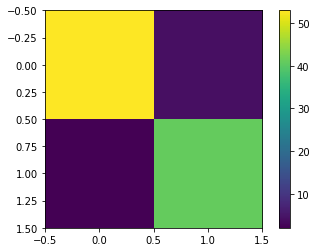

In [23]:
plt.imshow(conf_mat)
plt.colorbar()